## Linear Regression

##### Predict house prices in Boston

The Boston dataset is a small set representing the house prices in the city of Boston. It
contains 506 samples and 13 features.

In [5]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

df_dataset = pd.DataFrame(
 boston.data,
 columns=boston.feature_names,
)
df_dataset['target'] = boston.target

#### Data exploration

In [6]:
df_dataset.isnull().sum().sum()

0

<AxesSubplot:title={'center':'Mean of features'}>

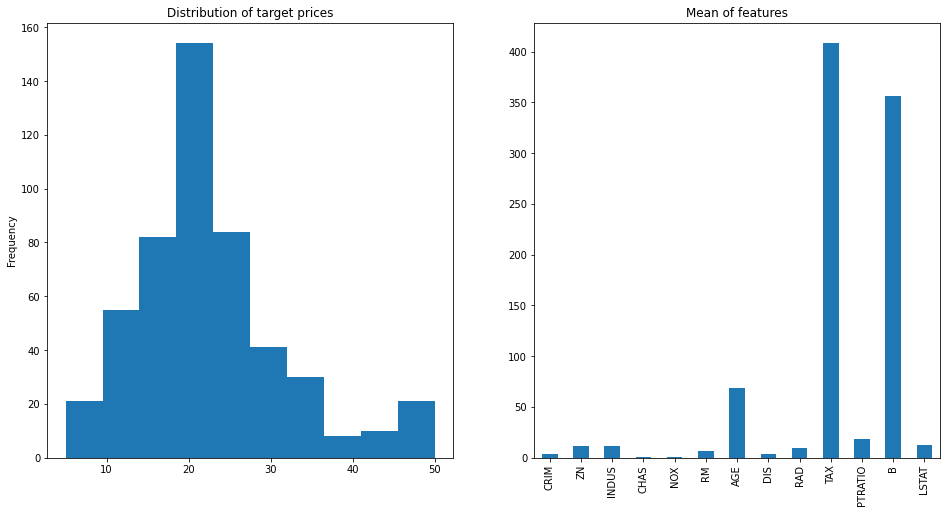

In [11]:
import matplotlib.pyplot as plt

fig , axs = plt.subplots(1, 2, figsize=(16, 8))

df_dataset['target'].plot(
    title='Distribution of target prices', kind='hist', ax=axs[0]
)
df_dataset[boston.feature_names].mean().plot(
    title='Mean of features', kind='bar', ax=axs[1]
)

In [12]:
df_dataset['target'].describe(percentiles=[.9, .95, .99])

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
50%       21.200000
90%       34.800000
95%       43.400000
99%       50.000000
max       50.000000
Name: target, dtype: float64

##### Splitting the data

In [16]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_dataset, test_size=0.4)

x_train = df_train[boston.feature_names]
x_test = df_test[boston.feature_names]
y_train = df_train['target']
y_test = df_test['target']

###### Calculating a baseline 

In [19]:
from sklearn.dummy import DummyRegressor

baselin = DummyRegressor(strategy='mean')
baselin.fit(x_train, y_train)

y_test_baselin = baselin.predict(x_test)

#### Training Linear Regressor

In [20]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

y_test_pred = reg.predict(x_test)

#### Evaluating the model

In [22]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('R2 regressor = {:.2f} vs Baseline {:.2f}'.format(r2_score(y_test, y_test_pred), r2_score(y_test, y_test_baselin)) )
print('MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format( mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_test, y_test_baselin) )  )
print('MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format( mean_squared_error(y_test, y_test_pred), mean_squared_error(y_test, y_test_baselin) )  )


R2 regressor = 0.70 vs Baseline -0.01
MAE Regressor = 3.32 vs Baseline = 6.41
MSE Regressor = 22.31 vs Baseline = 75.33


##### Showing feature coefficients 

In [24]:
df_feature_importance = pd.DataFrame(
    {
        'Features': x_train.columns,
        'Coeff': reg.coef_,
        'ABS(Coeff)': abs(reg.coef_),
    }
).set_index('Features').sort_values('Coeff', ascending=False)
df_feature_importance

,Coeff,ABS(Coeff)
Features,,
RM,3.431950,3.431950
CHAS,2.355514,2.355514
RAD,0.268040,0.268040
ZN,0.059646,0.059646
B,0.008793,0.008793
AGE,-0.003716,0.003716
TAX,-0.008901,0.008901
INDUS,-0.105403,0.105403
CRIM,-0.112803,0.112803


##### Scaling for more meaningful coefficients

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reg = LinearRegression()

# scaler.fit(x_train)
# x_train_scaled = scaler.transform(x_train)
### or use simply
x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

reg.fit(x_train_scaled, y_train)
y_test_red = reg.predict(x_test_scaled)

In [26]:
df_feature_importance = pd.DataFrame(
    {
        'Features': x_train.columns,
        'Coeff': reg.coef_,
        'ABS(Coeff)': abs(reg.coef_),
    }
).set_index('Features').sort_values('Coeff', ascending=False)
df_feature_importance

,Coeff,ABS(Coeff)
Features,,
RM,17.911348,17.911348
RAD,6.164918,6.164918
ZN,5.964631,5.964631
B,3.487315,3.487315
CHAS,2.355514,2.355514
AGE,-0.349265,0.349265
INDUS,-2.875400,2.875400
TAX,-4.664076,4.664076
NOX,-7.489044,7.489044


##### Adding polynomial features

*A polynomial transformation can solve both the non-linearity and feature interaction issues
for us. Given the original data, scikit-learn's polynomial transformer will transform the
features into higher dimensions*

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

feature_translator = [
 (f'x{i}', feature) for i, feature in enumerate(x_train.columns, 0)
]
def translate_feature_names(s):
    for key, val in feature_translator:
        s = s.replace(key, val)
    return s
poly_features = [
 translate_feature_names(f) for f in poly.get_feature_names_out()
]
x_train_poly = pd.DataFrame(x_train_poly, columns=poly_features)
x_test_poly = pd.DataFrame(x_test_poly, columns=poly_features)

In [30]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=False)
reg.fit(x_train_poly, y_train)
y_test_pred = reg.predict(x_test_poly)

In [31]:
print('R2 regressor = {:.2f} vs Baseline {:.2f}'.format(r2_score(y_test, y_test_pred), r2_score(y_test, y_test_baselin)) )
print('MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format( mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_test, y_test_baselin) )  )
print('MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format( mean_squared_error(y_test, y_test_pred), mean_squared_error(y_test, y_test_baselin) )  )

R2 regressor = -76.25 vs Baseline -0.01
MAE Regressor = 35.91 vs Baseline = 6.41
MSE Regressor = 5764.31 vs Baseline = 75.33


##### Training the lasso regressor

In [53]:
from sklearn.linear_model import Ridge, Lasso
reg = Lasso(tol=0.1, fit_intercept=False)
reg.fit(x_train_poly, y_train)
y_test_pred = reg.predict(x_test_poly)

print('R2 regressor = {:.2f} vs Baseline {:.2f}'.format(r2_score(y_test, y_test_pred), r2_score(y_test, y_test_baselin)) )
print('MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format( mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_test, y_test_baselin) )  )
print('MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format( mean_squared_error(y_test, y_test_pred), mean_squared_error(y_test, y_test_baselin) )  )

R2 regressor = 0.69 vs Baseline -0.01
MAE Regressor = 3.32 vs Baseline = 6.41
MSE Regressor = 23.10 vs Baseline = 75.33


###### N-fold cross-validation

In [55]:
from sklearn.linear_model import LassoCV
import numpy as np
# Make a list of 50 values between 0.000001 & 1,000,000
alphas = np.logspace(-6, 6, 50)
# We will do 5-fold cross validation
reg = LassoCV(tol=0.1, alphas=alphas, fit_intercept=False, cv=5)
reg.fit(x_train_poly, y_train)
y_train_pred = reg.predict(x_train_poly)
y_test_pred = reg.predict(x_test_poly)
print(f"LassoCV: Chosen alpha = {reg.alpha_}")


LassoCV: Chosen alpha = 1.325711365590108


Text(0, 0.5, 'Mean Squared Error')

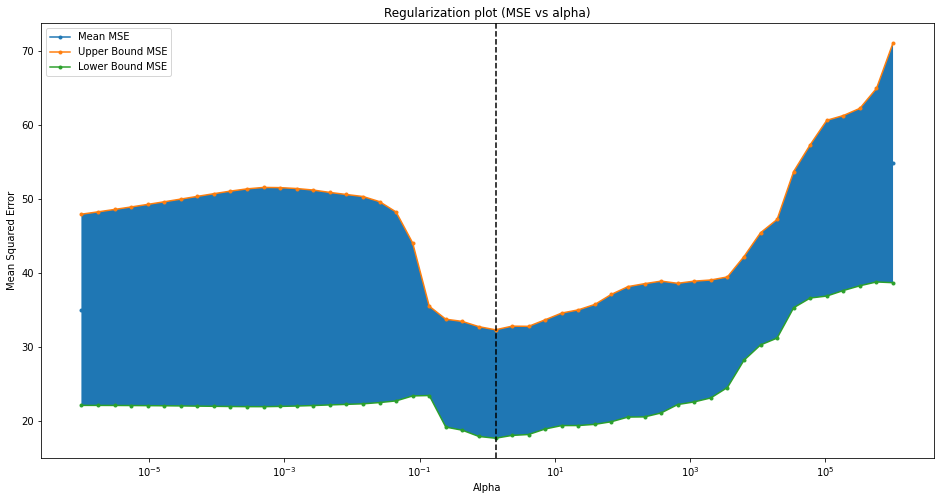

In [56]:
# n_folds equals to 5 here
n_folds = reg.mse_path_.shape[1]
# Calculate the mean and standard error for MSEs
mse_mean = reg.mse_path_.mean(axis=1)
mse_std = reg.mse_path_.std(axis=1)
# Std Error = Std Deviation / SQRT(number of samples)
mse_std_error = mse_std / np.sqrt(n_folds)

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
# We multiply by 1.96 for a 95% Confidence Interval
pd.DataFrame(
 {
 'alpha': reg.alphas_,
 'Mean MSE': mse_mean,
 'Upper Bound MSE': mse_mean + 1.96 * mse_std_error,
 'Lower Bound MSE': mse_mean - 1.96 * mse_std_error,
 }
).set_index('alpha')[
 ['Mean MSE', 'Upper Bound MSE', 'Lower Bound MSE']
].plot(
 title='Regularization plot (MSE vs alpha)',
 marker='.', logx=True, ax=ax
)
# Color the confidence interval
plt.fill_between(
 reg.alphas_,
 mse_mean + 1.96 * mse_std_error,
 mse_mean - 1.96 * mse_std_error,
) 
# Print a vertical line for the chosen alpha
ax.axvline(reg.alpha_, linestyle='--', color='k')
ax.set_xlabel('Alpha')
ax.set_ylabel('Mean Squared Error')


#### Finding regression intervals
create a noisy dataset, where : **y = x + noise**

In [59]:
import numpy as np
import pandas as pd

df_noisy = pd.DataFrame(
 {
 'x': np.random.randint(0, 30, size=150),
 'noise': np.random.normal(loc=0.0, scale=5.0, size=150)
 }
)
df_noisy['y'] = df_noisy['x'] + df_noisy['noise']


<AxesSubplot:xlabel='x', ylabel='y'>

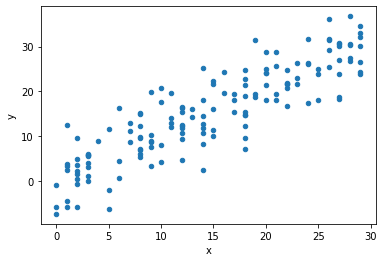

In [60]:
df_noisy.plot(kind="scatter", x="x", y="y")

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge

lr = LinearRegression()
br = BayesianRidge()

lr.fit(df_noisy[['x']], df_noisy['y'])
df_noisy['y_lr_pred'] = lr.predict(df_noisy[['x']])

br.fit(df_noisy[['x']], df_noisy['y'])
df_noisy['y_br_pred'], df_noisy['y_br_std'] = br.predict(df_noisy[['x']], return_std=True)


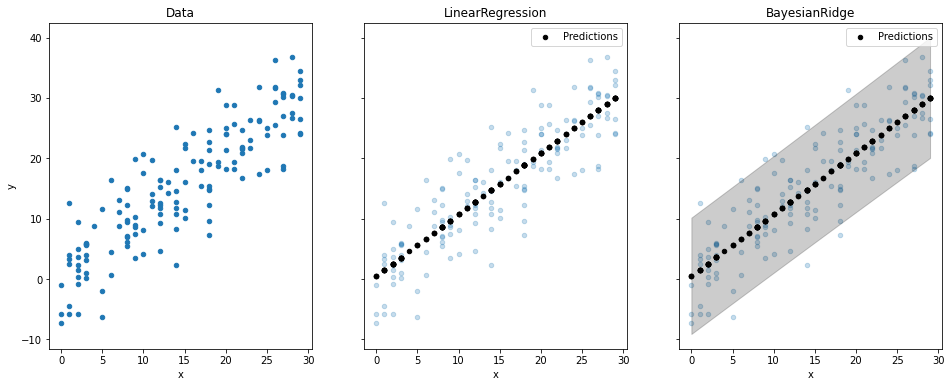

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharex=True, sharey=True)
# We plot the data 3 times
df_noisy.sort_values('x').plot(
 title='Data', kind='scatter', x='x', y='y', ax=axs[0]
)
df_noisy.sort_values('x').plot(
 kind='scatter', x='x', y='y', ax=axs[1], marker='o', alpha=0.25
)
df_noisy.sort_values('x').plot(
 kind='scatter', x='x', y='y', ax=axs[2], marker='o', alpha=0.25
)
# Here we plot the Linear Regression predictions
df_noisy.sort_values('x').plot(
 title='LinearRegression', kind='scatter', x='x', y='y_lr_pred',
 ax=axs[1], marker='o', color='k', label='Predictions'
)
# Here we plot the Bayesian Ridge predictions
df_noisy.sort_values('x').plot(
 title='BayesianRidge', kind='scatter', x='x', y='y_br_pred',
 ax=axs[2], marker='o', color='k', label='Predictions'
)
# Here we plot the range around the expected values
# We multiply by 1.96 for a 95% Confidence Interval
axs[2].fill_between(
 df_noisy.sort_values('x')['x'],
 df_noisy.sort_values('x')['y_br_pred'] - 1.96 *
    df_noisy.sort_values('x')['y_br_std'],
 df_noisy.sort_values('x')['y_br_pred'] + 1.96 *
 df_noisy.sort_values('x')['y_br_std'],
 color="k", alpha=0.2, label="Predictions +/- 1.96 * Std Dev"
)


#### Logistic Regression
Classifying the Iris dataset using logistic
regression

In [3]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(
    iris.data,
    columns= iris.feature_names
)

df['target'] = pd.Series(iris.target)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate 
import numpy as np

num_folds = 6

clf = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
accuracy_score = cross_validate(clf, df[iris.feature_names], df['target'], cv=num_folds, scoring=['accuracy'])

accuracy_mean = pd.Series(accuracy_score['test_accuracy']).mean()
accuracy_std = pd.Series(accuracy_score['test_accuracy']).std()
accuracy_sterror = accuracy_std / np.sqrt(num_folds)

print(
 'Logistic Regression: Accuracy ({}-fold): {:.2f} ~ {:.2f}'.format(
 num_folds,
 (accuracy_mean - 1.96 * accuracy_sterror),
 (accuracy_mean + 1.96 * accuracy_sterror),
 )
)


Logistic Regression: Accuracy (6-fold): 0.94 ~ 0.99
